### Условия
Исследовать фазовый портрет системы «хищник-жертва», описываемой следующей системой дифференциальных уравнений:
dx/dt=0.1x-0.03x2-0.05xy/(1+x),
dy/dt=-0.2y+0.15xy.
Для построения семейства фазовых траекторий провести вычислительный эксперимент, используя систему LabVIEW. Численное интегрирование уравнений выполнить с помощью ВИ «ODE Cash Karp 5th Order». Диаграмма на языке G должна позволять интегрировать не менее трех траекторий. Рекомендуемые параметры численного интегрирования: x0=3.7, y0=0.01, шаг интегрирования = 0.001, точность=0.00001, tstart=0, tend=400. Найти координаты особых точек аналитически и определить их тип.

### 1. Зададим систему дифференциальных уравнений

Для начала, мы определим функции, которые описывают нашу систему. В Python мы будем использовать библиотеку `scipy` для численного интегрирования.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Определяем уравнения системы
def predator_prey(t, z):
    x, y = z
    dxdt = 0.1 * x - 0.03 * x**2 - 0.05 * x * y / (1 + x)
    dydt = -0.2 * y + 0.15 * x * y
    return [dxdt, dydt]

# Задаем начальные условия и параметры интегрирования
x0, y0 = 3.7, 0.01
t_span = (0, 400)

### 2. Решаем систему с разными начальными условиями

Проведем численное интегрирование для нескольких начальных условий.

In [2]:
# Начальные условия
initial_conditions = [
    (3.7, 0.01),
    (2.0, 0.02),
    (1.0, 0.01)
]

# Расчет траекторий для различных начальных условий
solutions = []
for ic in initial_conditions:
    sol = solve_ivp(predator_prey, t_span, ic, method='RK45', t_eval=np.linspace(0, 400, 4000))
    solutions.append(sol)

### 3. Визуализируем фазовые траектории

Теперь построим фазовые траектории.

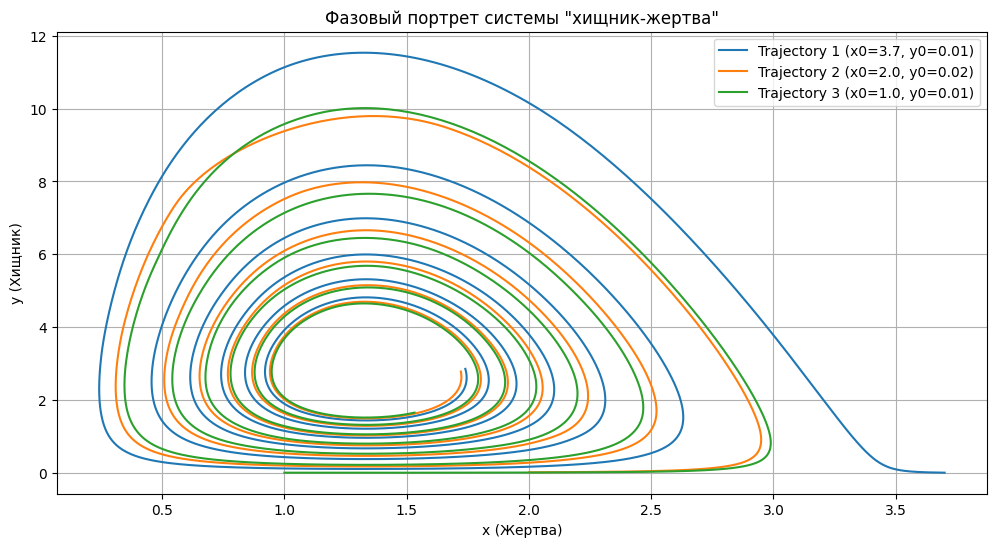

In [3]:
plt.figure(figsize=(12, 6))

for idx, sol in enumerate(solutions):
    plt.plot(sol.y[0], sol.y[1], label=f'Trajectory {idx + 1} (x0={initial_conditions[idx][0]}, y0={initial_conditions[idx][1]})')

plt.title('Фазовый портрет системы "хищник-жертва"')
plt.xlabel('x (Жертва)')
plt.ylabel('y (Хищник)')
plt.legend()
plt.grid()
plt.show()

### 4. Поиск особых точек

Особые точки находятся из уравнения, приравняв производные к нулю:
$$\frac{dx}{dt} = 0$$
$$\frac{dy}{dt} = 0$$

То есть нам нужно решить систему уравнений:
$$
\begin{cases}
0.1x - 0.03x^2 - \frac{0.05xy}{1 + x} = 0 \\
-0.2y + 0.15xy = 0
\end{cases}
$$

### 5. Аналитическое решение системы уравнений

Мы можем использовать библиотеку `sympy` для решения этой системы уравнений.

In [4]:
import sympy as sp

# Определяем переменные
x, y = sp.symbols('x y')

# Определяем уравнения системы
eq1 = 0.1 * x - 0.03 * x**2 - 0.05 * x * y / (1 + x)
eq2 = -0.2 * y + 0.15 * x * y

# Решаем уравнения
sols = sp.solve([eq1, eq2], (x, y))
sols

[(0.0, 0.0), (1.33333333333333, 2.80000000000000), (3.33333333333333, 0.0)]

### 6. Определение типа особых точек

Для определения типа особых точек используем Якобиан системы уравнений. Для данной системы:
$$
J = \begin{bmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{bmatrix}
$$

In [5]:
# Определяем производные для Якобиана
f1 = 0.1 * x - 0.03 * x**2 - 0.05 * x * y / (1 + x)
f2 = -0.2 * y + 0.15 * x * y

# Якобиан
J = sp.Matrix([[sp.diff(f1, x), sp.diff(f1, y)], [sp.diff(f2, x), sp.diff(f2, y)]])

# Функция для определения типа особой точки
def determine_type_of_fixed_point(j_matrix, x_star, y_star):
    J_subs = J.subs({x: x_star, y: y_star})
    eigenvalues = J_subs.eigenvals()
    print(f"\nСобственные значения в точке ({x_star}, {y_star}):", eigenvalues)
    
    real_parts = [ev.as_real_imag()[0] for ev in eigenvalues]
    if all(rp < 0 for rp in real_parts):
        print("Тип: Устойчивый узел")
    elif all(rp > 0 for rp in real_parts):
        print("Тип: Неустойчивый узел")
    elif any(rp < 0 for rp in real_parts) and any(rp > 0 for rp in real_parts):
        print("Тип: Седло")
    else:
        print("Тип: Центр или Спираль")

# Определяем тип каждой особой точки
for sol in sols:
    determine_type_of_fixed_point(J, sol[0], sol[1])


Собственные значения в точке (0.0, 0.0): {0.100000000000000: 1, -0.200000000000000: 1}
Тип: Седло

Собственные значения в точке (1.33333333333333, 2.80000000000000): {-0.00285714285714286 - 0.10950724512421*I: 1, -0.00285714285714286 + 0.10950724512421*I: 1}
Тип: Устойчивый узел

Собственные значения в точке (3.33333333333333, 0.0): {-0.100000000000000: 1, 0.300000000000000: 1}
Тип: Седло
